In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

## Description
Person ID: An identifier for each individual in the dataset.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head(7)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df['Occupation'].value_counts()


Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [5]:
df['Occupation'].value_counts()


Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [6]:
df['Sleep Disorder'].value_counts()


Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### So looking in the data (Sleep Disorder) has NAN values, we can change to None since the nan value indicate that the person have no disorder and also has both Normal weight and Normal on the (BMI Category) which which means the same data.

In [8]:
df.isna().sum()


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [9]:
n = df.fillna("Nothing")
n["BMI Category"] = n["BMI Category"].replace("Normal Weight", "Normal")
no_duplicates = n.drop_duplicates(subset=['Person ID', 'Gender'])
n


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Visualisation

In [10]:
occupation_stress_df = df[['Occupation', 'Stress Level','Gender']].copy()
mean_stress_by_occupation_gender = occupation_stress_df.groupby(['Occupation', 'Gender'])['Stress Level'].mean().reset_index()
gender_stress_df = df.groupby('Gender')['Stress Level'].mean().reset_index()
sleep_stress_df = df.groupby('Gender')['Sleep Duration'].mean().reset_index()
occupation_stress_df = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()
quality_stress_df = df.groupby('Occupation')['Quality of Sleep'].mean().reset_index()




## Distribution of BMI categories and Sleep Disorder

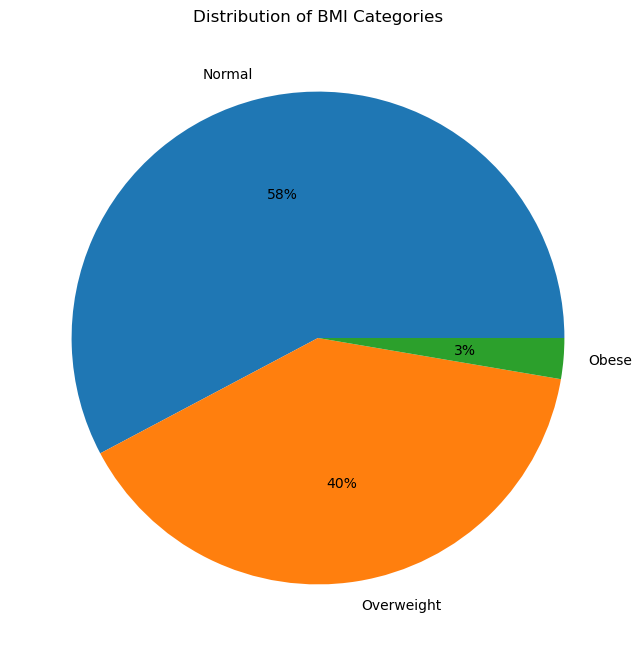

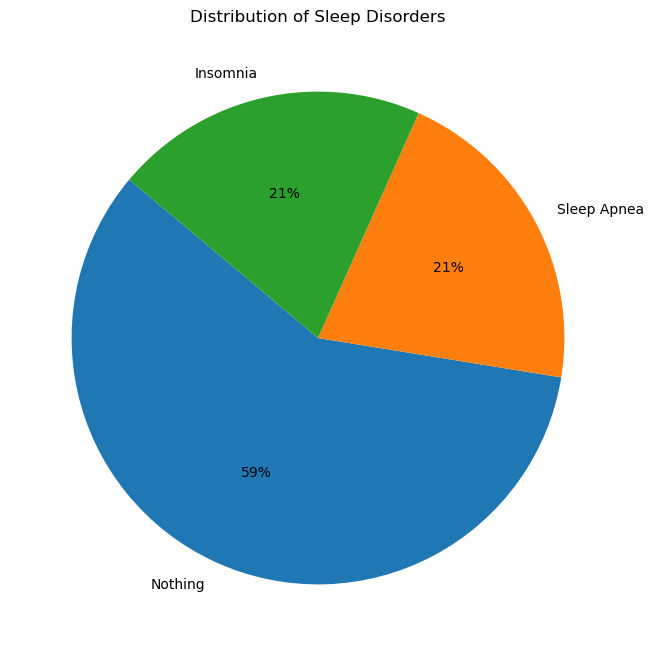

In [11]:
bmi_counts = n['BMI Category'].value_counts()
sleep_disorder_counts = n['Sleep Disorder'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%.0f%%')
plt.title('Distribution of BMI Categories')
plt.show()



plt.figure(figsize=(8, 8))
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Distribution of Sleep Disorders')
plt.show()

## Is there a relationship between sleep duration and stress levels by gender?

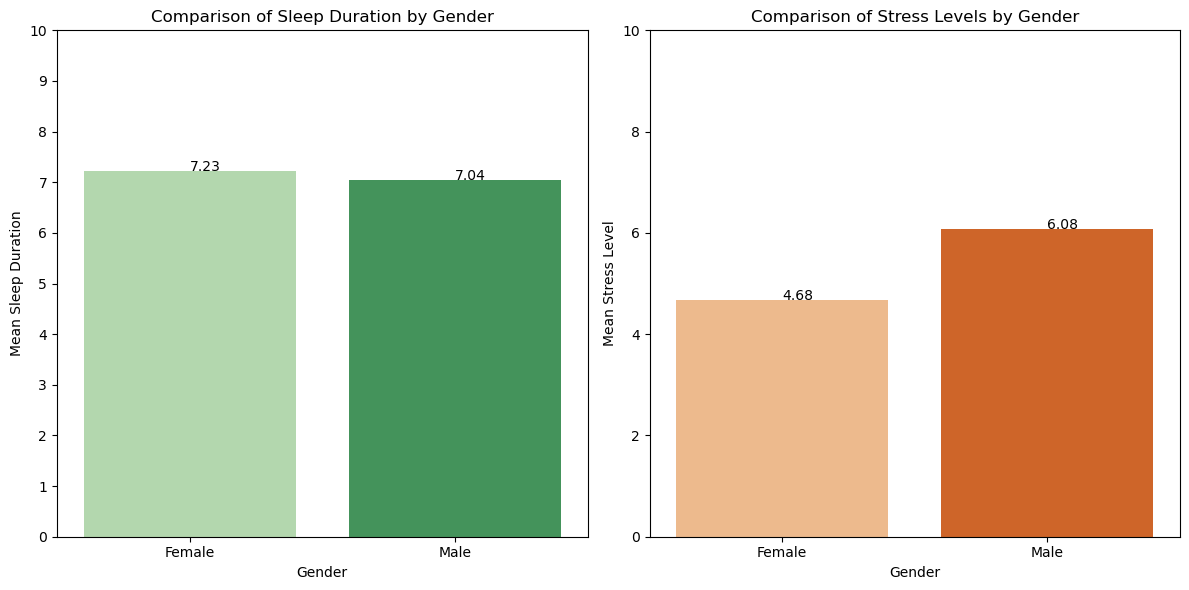

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=sleep_stress_df, x='Gender', y='Sleep Duration', palette='Greens')
plt.title('Comparison of Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Sleep Duration')
for index, row in sleep_stress_df.iterrows():
    plt.text(index, row['Sleep Duration'], f'{row["Sleep Duration"]:.2f}',  fontsize=10, color='black')
plt.yticks(range(11))






plt.subplot(1, 2, 2)
sns.barplot(data=gender_stress_df, x='Gender', y='Stress Level', palette='Oranges')
plt.title('Comparison of Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Stress Level')
for index, row in gender_stress_df.iterrows():
    plt.text(index, row['Stress Level'], f'{row["Stress Level"]:.2f}',  fontsize=10, color='black')

plt.ylim(0, 10)
plt.tight_layout()
plt.show()


## Gender Distribution of occupation by Gender

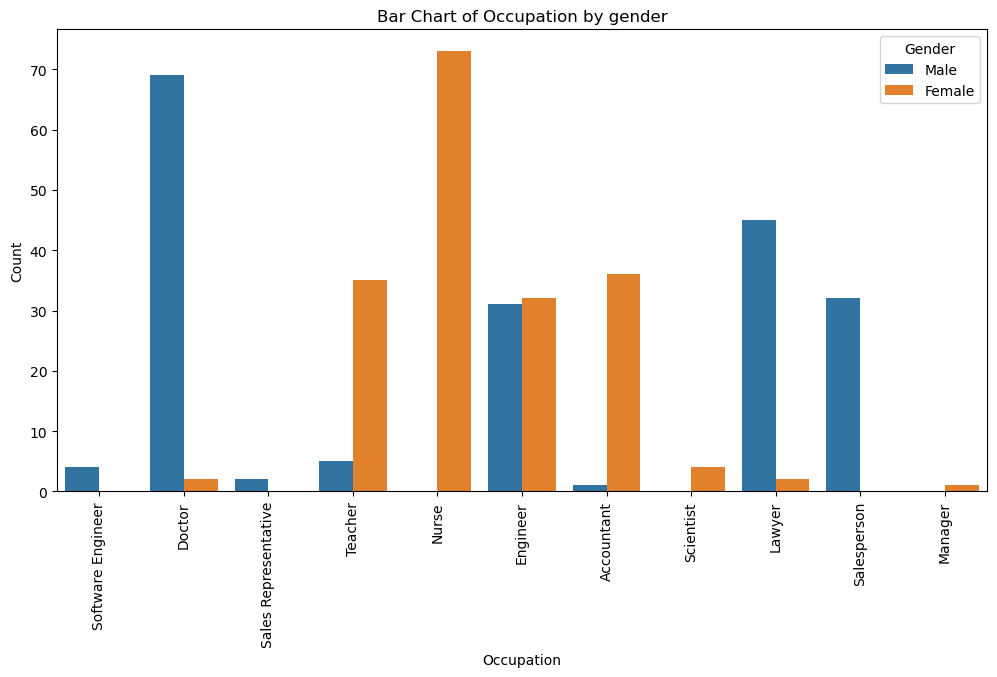

In [13]:
plt.figure(figsize=(12, 6))

sns.countplot(data=n, x="Occupation", hue = "Gender")
plt.title("Bar Chart of Occupation by gender")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)  
plt.legend(title="Gender")
plt.show()

## Seperating the blood pressure as systolic and diastolic 
Aggreating the Blood Pressure using MBP formula 

In [14]:
n[['Systolic', 'Diastolic']] = n['Blood Pressure'].str.split('/', expand=True)
n['Systolic'] = pd.to_numeric(n['Systolic'])
n['Diastolic'] = pd.to_numeric(n['Diastolic'])
#MBP Formula to find the mean of Blood Pressure 
n['MBP'] = n['Diastolic'] + (n['Systolic'] - n['Diastolic']) / 3
n = n.sort_values(by='Person ID', ascending=True)
n.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,MBP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing,126,83,97.333333
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing,125,80,95.000000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing,125,80,95.000000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,106.666667
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,106.666667


### Is there a difference in daily steps between different occupations?"

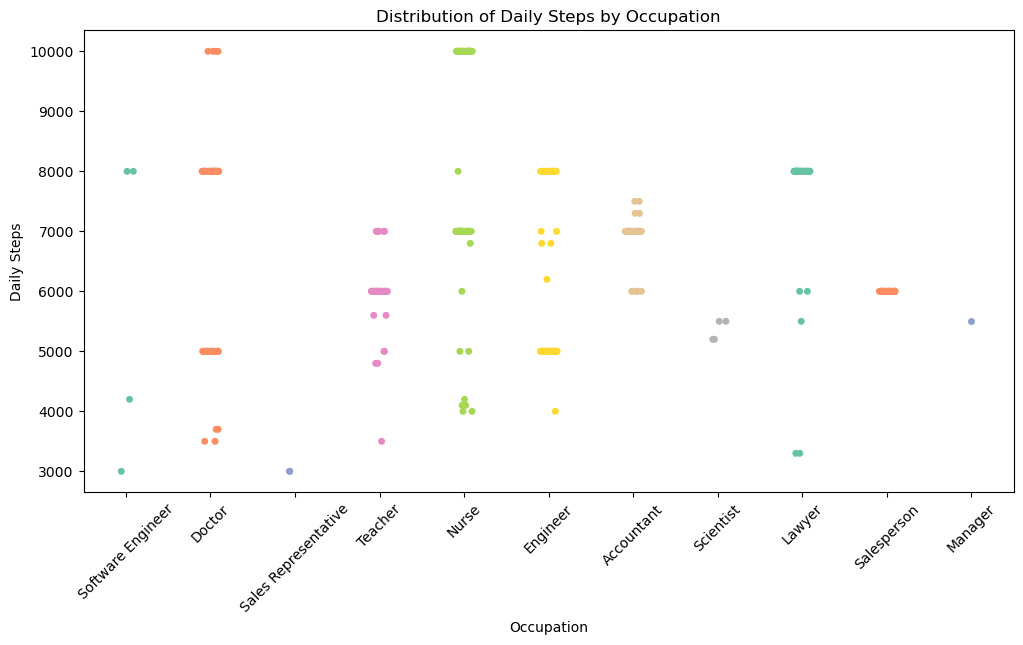

In [15]:


plt.figure(figsize=(12, 6))
sns.stripplot(x='Occupation', y='Daily Steps', data=n ,palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Daily Steps')
plt.title('Distribution of Daily Steps by Occupation')
plt.show()


### How are the BMI Category distributed by Occupation?

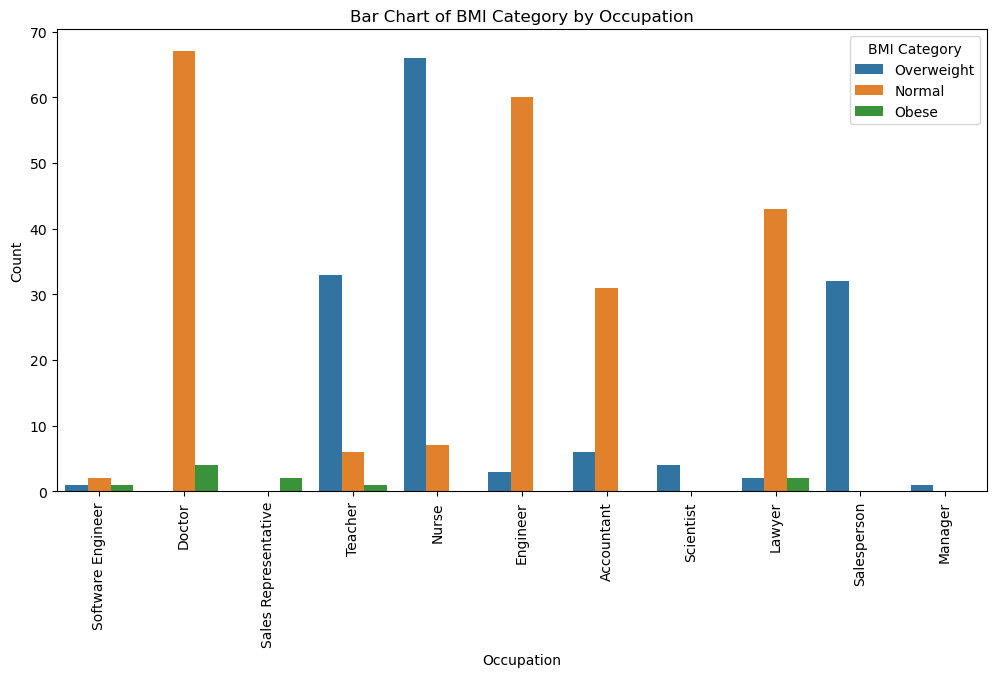

In [16]:
plt.figure(figsize=(12, 6))

sns.countplot(data=n, x="Occupation", hue="BMI Category")
plt.title("Bar Chart of BMI Category by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)  
plt.legend(title="BMI Category")
plt.show()

## Are people with higher daily steps more likely to have a healthy BMI category?



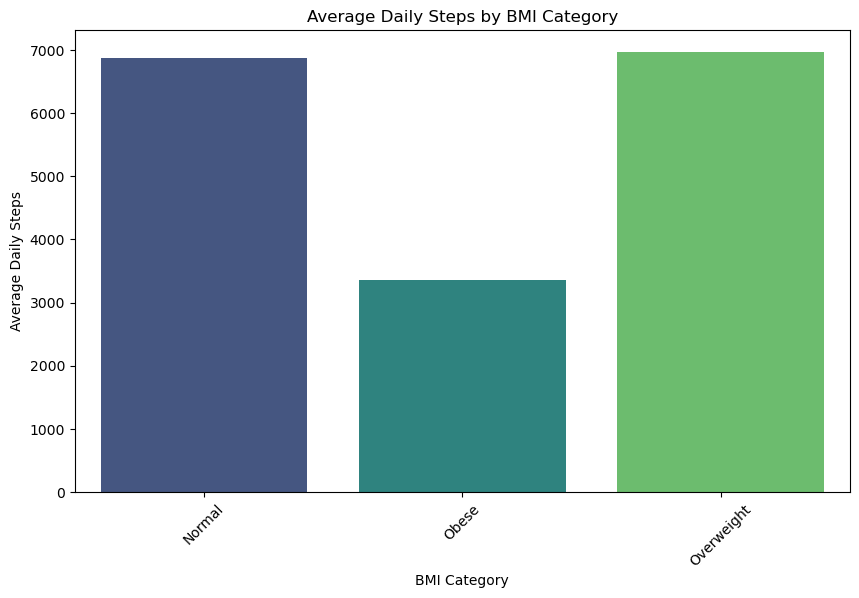

In [17]:
average_steps_by_bmi = n.groupby('BMI Category')['Daily Steps'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_steps_by_bmi, x='BMI Category', y='Daily Steps', palette='viridis')
plt.xlabel('BMI Category')
plt.ylabel('Average Daily Steps')
plt.title('Average Daily Steps by BMI Category')
plt.xticks(rotation=45) 
plt.show()

## Do people in specific occupations tend to have better or worse quality of sleep?


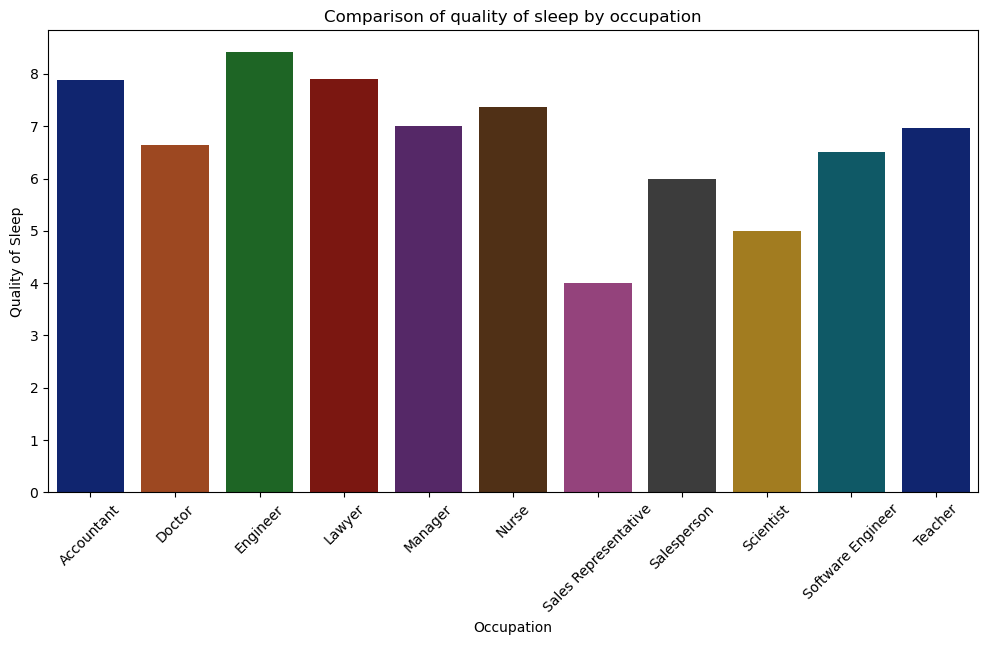

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot( data=quality_stress_df ,x='Occupation', y='Quality of Sleep',palette="dark")
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.title('Comparison of quality of sleep by occupation')
plt.show()

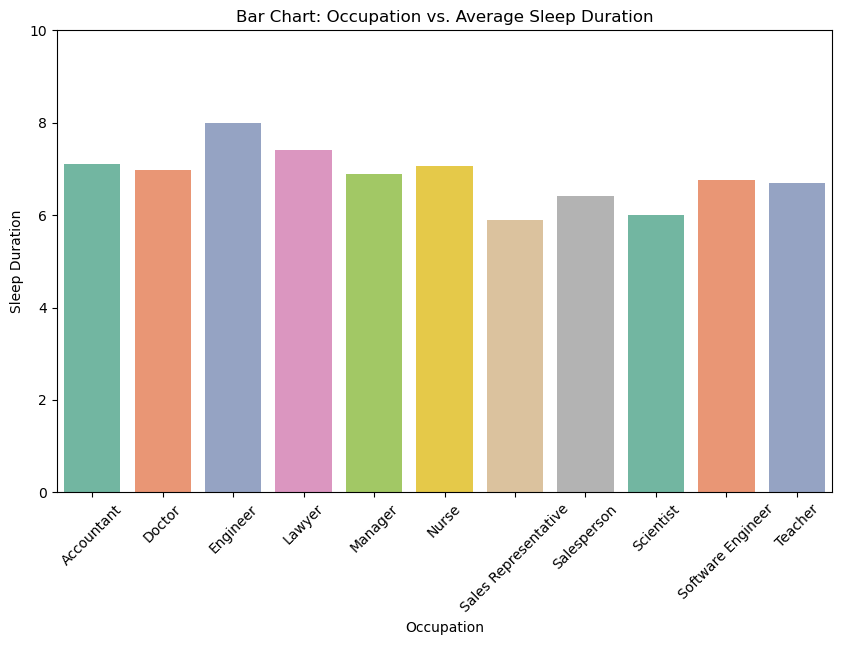

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Sleep Duration', data=occupation_stress_df ,palette="Set2" )
plt.xticks(rotation=45)
plt.title('Bar Chart: Occupation vs. Average Sleep Duration')
plt.ylim(0, 10)

plt.show()

## How does the distribution of blood pressure values vary with age among individuals in different occupations?

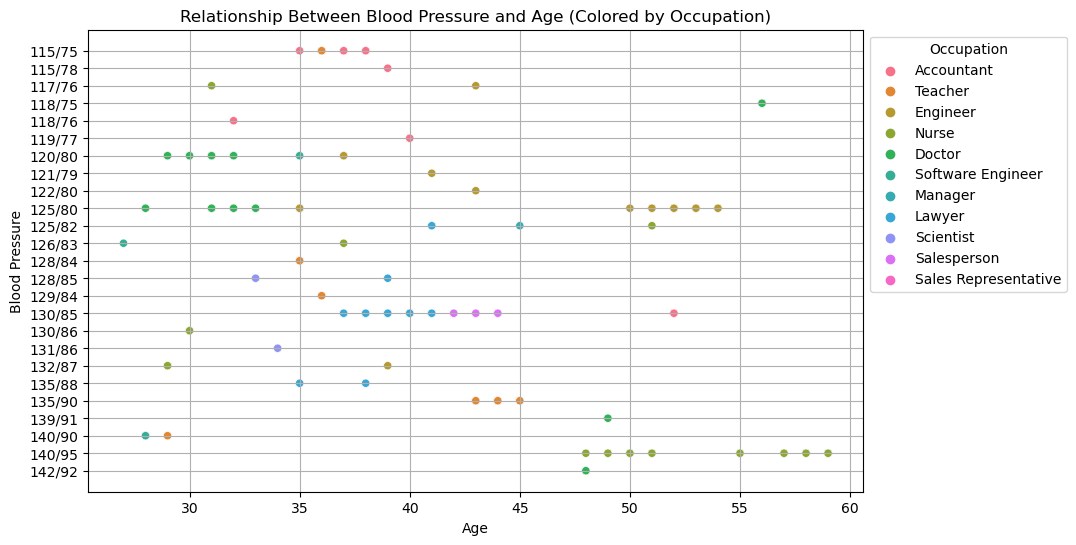

In [20]:
n.sort_values(by='Blood Pressure', inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=n, x='Age', y='Blood Pressure', hue='Occupation', palette="husl")
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Relationship Between Blood Pressure and Age (Colored by Occupation)')
plt.legend(title='Occupation', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()


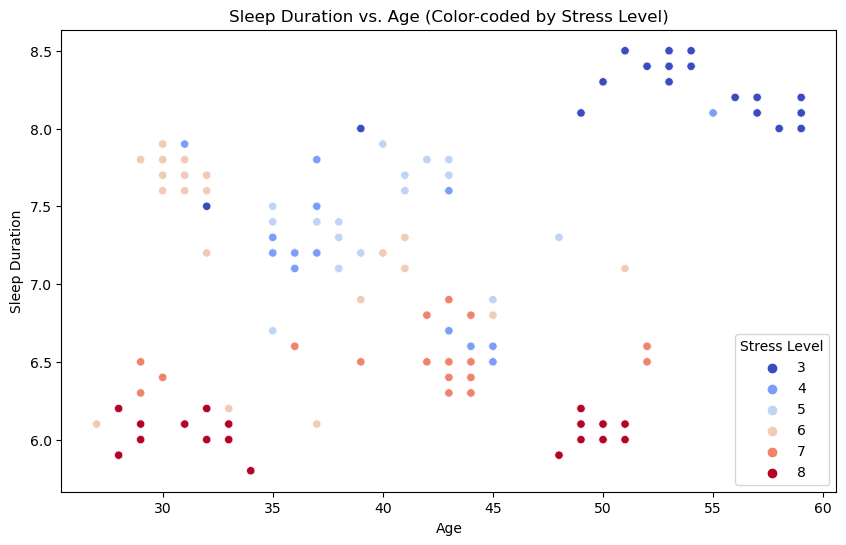

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Stress Level', palette='coolwarm')
plt.title('Sleep Duration vs. Age (Color-coded by Stress Level)')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.legend(title='Stress Level')

plt.show()

  ## Is there a correlation between occupation and stress levels?

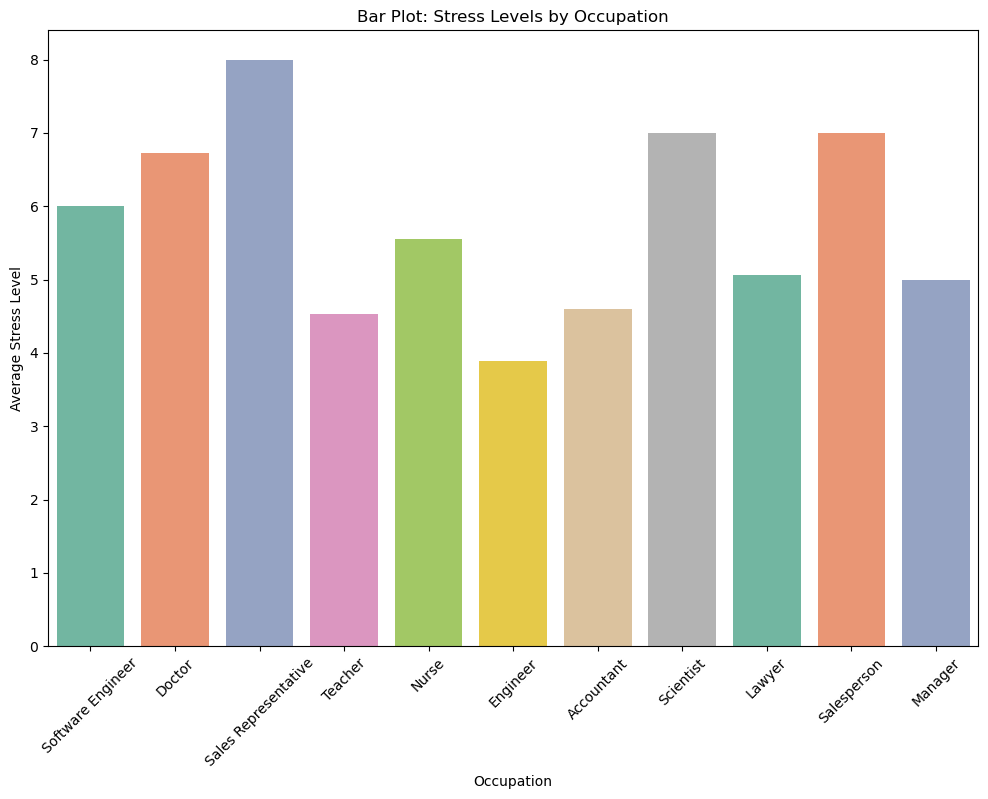

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Occupation', y='Stress Level', palette='Set2' ,errorbar=None)
plt.title('Bar Plot: Stress Levels by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45)  
plt.show()

## Are there significant differences in the average Mean Blood Pressure (MBP) among different occupations?

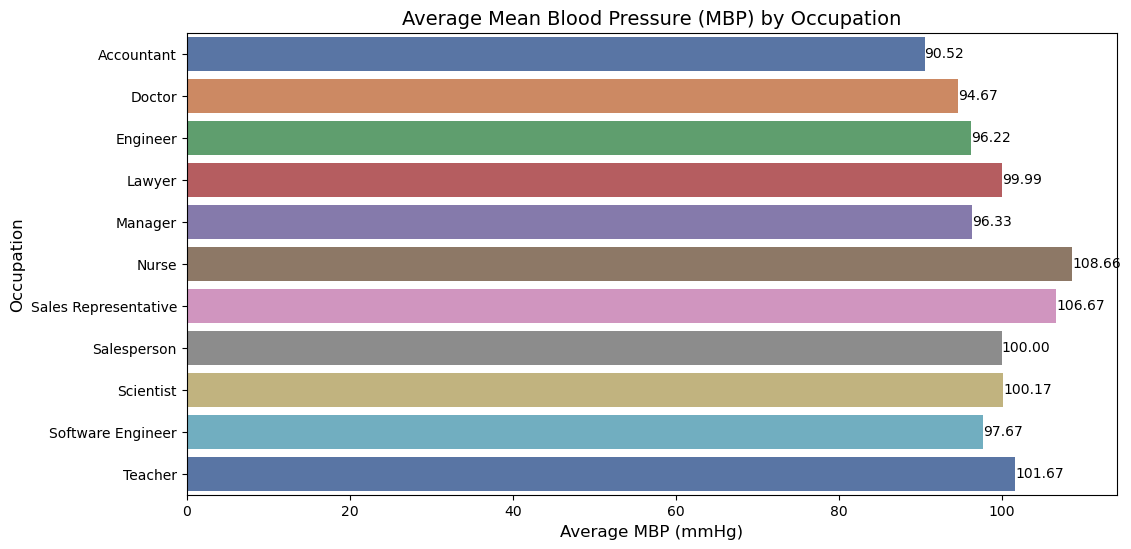

In [23]:
MBP_df = n.groupby('Occupation')['MBP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='MBP', y='Occupation', data=MBP_df, palette='deep')
plt.title('Average Mean Blood Pressure (MBP) by Occupation', fontsize=14)
plt.xlabel('Average MBP (mmHg)', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(MBP_df['MBP']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.show()

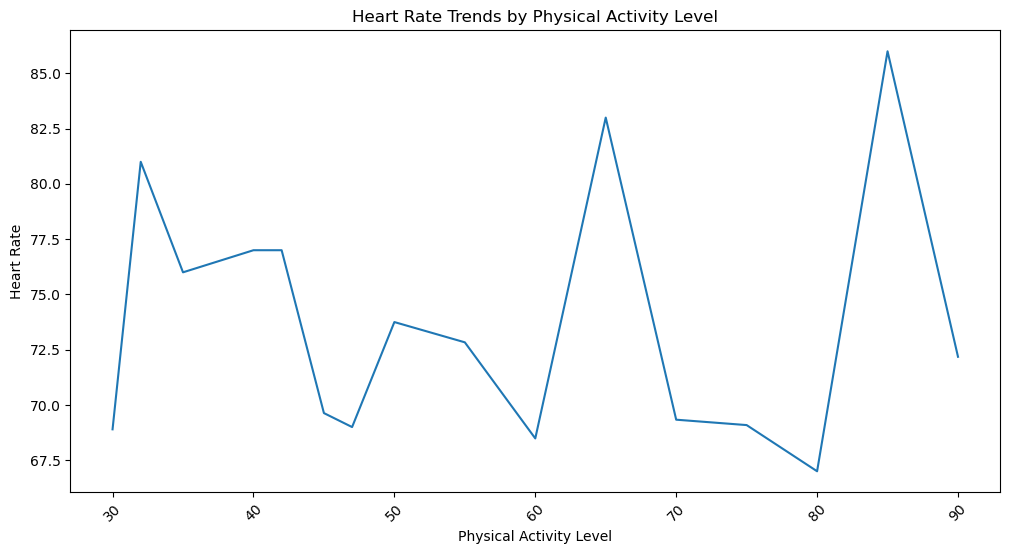

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Physical Activity Level", y="Heart Rate", data=n,errorbar=None )
plt.title("Heart Rate Trends by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Heart Rate")
plt.xticks(rotation=45)
plt.show()

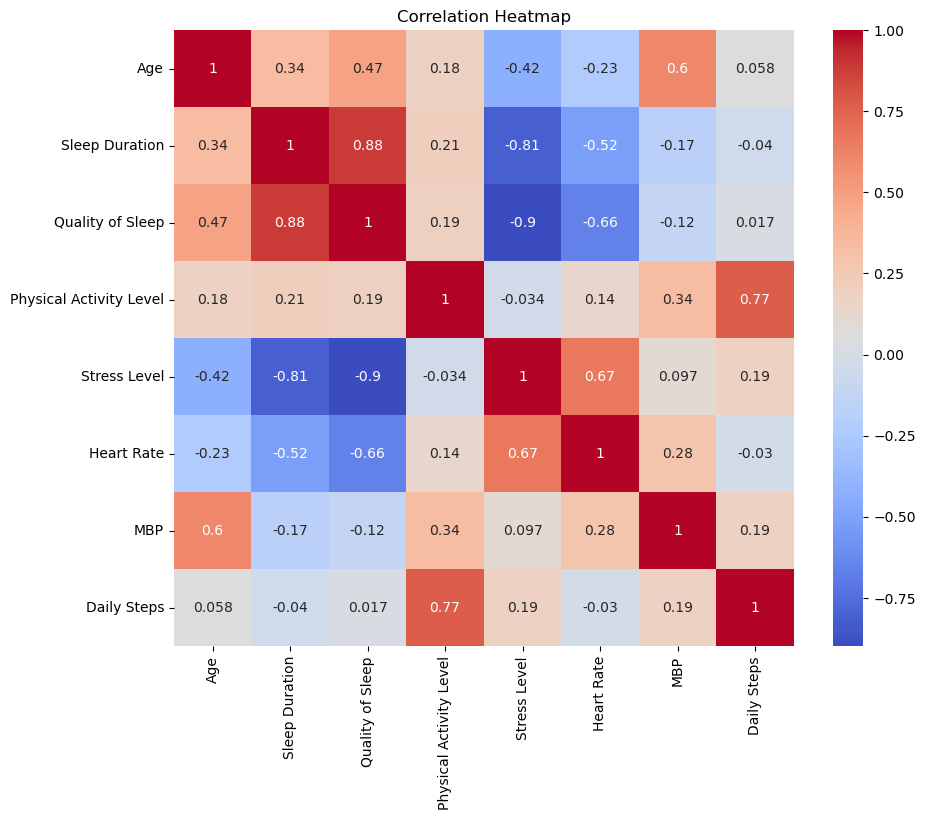

In [25]:
selected_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'MBP', 'Daily Steps']
new_df = n[selected_columns]

correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()